# Union and exclusive intersection

In [1]:
import networkx as nx
import pandas as pd

## Loading data

In [2]:
pazsecuenta_df = pd.read_csv('data/JS_presentation/lapazsecuenta.csv')
acuerdopaz_df = pd.read_csv('data/JS_presentation/acuerdo.csv')
hechospaz_df = pd.read_csv('data/JS_presentation/hechosdepaz.csv')
ninospaz_df = pd.read_csv('data/JS_presentation/ninospaz.csv')
twitter_df = pd.read_csv('data/JS_presentation/twitterpaz.csv')

## Pre-processing data

### Cleaning data

In [3]:
my_stopwords = ['alguien', 'decide', 'decir', 'demás', 'dice', 'dirías', 'si', 'sí', 'vez', 'veces', 'video', 'ya']

In [4]:
pazsecuenta_df.id = pazsecuenta_df.id.str.lower()
pazsecuenta_df = pazsecuenta_df[~pazsecuenta_df.id.isin(my_stopwords)]

acuerdopaz_df.id = acuerdopaz_df.id.str.lower()
acuerdopaz_df = acuerdopaz_df[~acuerdopaz_df.id.isin(my_stopwords)]

hechospaz_df.id = hechospaz_df.id.str.lower()
hechospaz_df = hechospaz_df[~hechospaz_df.id.isin(my_stopwords)]

ninospaz_df.id = ninospaz_df.id.str.lower()
ninospaz_df = ninospaz_df[~ninospaz_df.id.isin(my_stopwords)]

twitter_df.id = twitter_df.id.str.lower()
twitter_df = twitter_df[~twitter_df.id.isin(my_stopwords)]

### Normalizing data

In [5]:
N = pazsecuenta_df.freq.max()
pazsecuenta_df['norm'] = pazsecuenta_df.freq.apply(lambda x: x * 100 // N)
N = acuerdopaz_df.freq.max()
acuerdopaz_df['norm'] = acuerdopaz_df.freq.apply(lambda x: x * 100 // N)
N = hechospaz_df.freq.max()
hechospaz_df['norm'] = hechospaz_df.freq.apply(lambda x: x * 100 // N)
N = ninospaz_df.freq.max()
ninospaz_df['norm'] = ninospaz_df.freq.apply(lambda x: x * 100 // N)
N = twitter_df.freq.max()
twitter_df['norm'] = twitter_df.freq.apply(lambda x: x * 100 // N)

## Processing data

In [10]:
all_df = pd.concat([pazsecuenta_df, acuerdopaz_df, hechospaz_df, ninospaz_df, twitter_df]).groupby('id').sum()

In [11]:
all_sr = all_df.reset_index().set_index('id').norm
all_sr.index.name = None

In [20]:
list(pazsecuenta_df.id)

['años',
 'bueno',
 'colombia',
 'gente',
 'hablar',
 'historia',
 'literatura',
 'momento',
 'mundo',
 'niño',
 'niños',
 'palabra',
 'palabras',
 'paz',
 'personas',
 'siempre',
 'vida',
 'violencia']

In [27]:
g = nx.DiGraph()

g.add_node('La paz se cuenta', type='group')
g.add_node('Acuerdo de paz', type='group')
g.add_node('Hechos de paz', type='group')
g.add_node('Los niños piensan la paz', type='group')
g.add_node('Conversación en Twitter', type='group')

pazsecuenta = list(pazsecuenta_df.id)
acuerdopaz = list(acuerdopaz_df.id)
hechospaz = list(hechospaz_df.id)
ninospaz = list(ninospaz_df.id)
twitter = list(twitter_df.id)

for w in all_sr.index:
    g.add_node(w, type='word', weight=int(all_sr[w]))
    if w in pazsecuenta:
        g.add_edge('La paz se cuenta', w)
    if w in acuerdopaz:
        g.add_edge('Acuerdo de paz', w)
    if w in hechospaz:
        g.add_edge('Hechos de paz', w)
    if w in ninospaz:
        g.add_edge('Los niños piensan la paz', w)
    if w in twitter:
        g.add_edge('Conversación en Twitter', w)

In [28]:
nx.write_gexf(g, 'data/words.gexf')

In [71]:
intersection_lst = set(pazsecuenta_df.id).intersection(acuerdopaz_df.id, hechospaz_df.id, ninospaz_df.id, twitter_df.id)

In [72]:
set(acuerdopaz_df.id).intersection(hechospaz_df.id, ninospaz_df.id, twitter_df.id)

set()

In [73]:
set(pazsecuenta_df.id).intersection(hechospaz_df.id, ninospaz_df.id, twitter_df.id)

{'mundo'}

In [74]:
set(pazsecuenta_df.id).intersection(acuerdopaz_df.id, ninospaz_df.id, twitter_df.id)

set()

In [75]:
set(pazsecuenta_df.id).intersection(acuerdopaz_df.id, hechospaz_df.id, twitter_df.id)

set()

In [76]:
set(pazsecuenta_df.id).intersection(acuerdopaz_df.id, hechospaz_df.id, ninospaz_df.id)

set()

In [78]:
pazsecuenta = list(pazsecuenta_df.id)
acuerdopaz = list(acuerdopaz_df.id)
hechospaz = list(hechospaz_df.id)
ninospaz = list(ninospaz_df.id)
twitter = list(twitter_df.id)

In [80]:
for i, x in enumerate([pazsecuenta, acuerdopaz, hechospaz, ninospaz, twitter]):
    for j, y in enumerate([pazsecuenta, acuerdopaz, hechospaz, ninospaz, twitter]):
        if j > i:
            inter = set(x).intersection(y)
            if inter:
                print(i, j, inter)

0 1 {'paz', 'colombia'}
0 2 {'mundo', 'personas', 'gente'}
0 3 {'niños', 'violencia', 'palabra', 'personas', 'gente', 'mundo', 'hablar'}
0 4 {'mundo', 'paz', 'colombia'}
1 4 {'paz', 'acuerdo', 'colombia'}
2 3 {'persona', 'calle', 'personas', 'gente', 'mundo', 'lugar'}
2 4 {'mundo'}
3 4 {'mundo', 'guerra', 'cuba'}


In [70]:
x_pazsecuenta_lst = set(pazsecuenta).difference(acuerdopaz, hechospaz, ninospaz, twitter)
x_acuerdopaz_lst = set(acuerdopaz).difference(pazsecuenta, hechospaz, ninospaz, twitter)
x_hechospaz_lst = set(hechospaz).difference(pazsecuenta, acuerdopaz, ninospaz, twitter)
x_ninospaz_lst = set(ninospaz).difference(pazsecuenta, acuerdopaz, hechospaz, twitter)
x_twitter_lst = set(twitter).difference(pazsecuenta, acuerdopaz, hechospaz, ninospaz)

x_disjunction_lst = set(x_pazsecuenta_lst).union(x_acuerdopaz_lst, x_hechospaz_lst, x_ninospaz_lst, x_twitter_lst)

In [67]:
len(x_pazsecuenta_lst)+\
len(x_acuerdopaz_lst)+\
len(x_hechospaz_lst)+\
len(x_ninospaz_lst)+\
len(x_twitter_lst)

66

In [68]:
len(x_disjunction_lst)

66

In [56]:
x_twitter_lst

{'adios',
 'adiós',
 'civil',
 'decide',
 'farc',
 'firma',
 'noticias',
 'resistencia',
 'venezuela',
 'yaracuy'}

In [35]:
union_lst

{'acuerdo',
 'adios',
 'adiós',
 'alguien',
 'años',
 'barrio',
 'bogota',
 'bueno',
 'calle',
 'casa',
 'ciudad',
 'civil',
 'clase',
 'colegio',
 'colombia',
 'comunidad',
 'conflicto',
 'cuba',
 'daño',
 'decide',
 'destruir',
 'dolor',
 'familiar',
 'farc',
 'farc-ep',
 'firma',
 'gente',
 'gobierno',
 'grupo',
 'guerra',
 'habana',
 'habla',
 'hablando',
 'hablar',
 'hermana',
 'hermano',
 'hija',
 'hijo',
 'hijos',
 'historia',
 'hogar',
 'hombre',
 'literatura',
 'lugar',
 'madre',
 'mama',
 'matar',
 'momento',
 'muerte',
 'mujer',
 'mundo',
 'nacional',
 'niño',
 'niños',
 'noticias',
 'padre',
 'padres',
 'pais',
 'palabra',
 'palabras',
 'papa',
 'paz',
 'país',
 'pelear',
 'persona',
 'personas',
 'planeta',
 'política',
 'pueblo',
 'razones',
 'resistencia',
 'señor',
 'siempre',
 'social',
 'sociedad',
 'sufrimiento',
 'trabajo',
 'venezuela',
 'vida',
 'violencia',
 'yaracuy'}

In [9]:
s1=set([1,3])
s2=set([2,3])
s3=set([3,4])

In [10]:
s1.union(s2,s3)

{1, 2, 3, 4}

In [11]:
s1.intersection(s2,s3)

{3}

### Together

In [5]:
all_texts = text2 + ' ' + text3 + ' ' + text4 + ' ' + text5 + ' ' + text6 + ' ' + text7

In [6]:
general_counter = Counter(all_texts.split())

In [7]:
N = 20

In [8]:
all_kws = [k for k, v in general_counter.most_common(N)]

In [9]:
all_kws

['niños',
 'paz',
 'siempre',
 'palabras',
 'gente',
 'años',
 'niño',
 'palabra',
 'mundo',
 'colombia',
 'momento',
 'bueno',
 'historia',
 'vida',
 'hablar',
 'vez',
 'violencia',
 'personas',
 'literatura',
 'veces']

In [10]:
sr = pd.Series([general_counter[k] for k in all_kws], index=all_kws).sort_index()

In [11]:
sr

años           45
bueno          36
colombia       39
gente          47
hablar         35
historia       36
literatura     27
momento        36
mundo          42
niño           45
niños         105
palabra        44
palabras       52
paz            91
personas       27
siempre        64
veces          26
vez            34
vida           36
violencia      29
dtype: int64

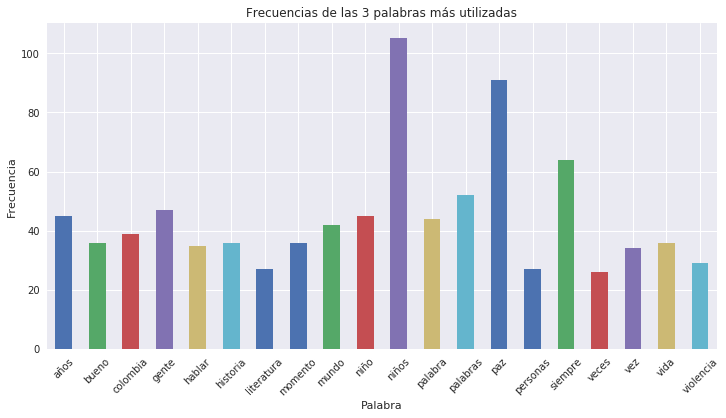

In [21]:
ax = sr.plot(
    figsize=(12, 6),
    kind='bar',
    title='Frecuencias de las ' + str(N) + ' palabras más utilizadas',
    rot=45,
)
ax.set_xlabel('Palabra')
ax.set_ylabel('Frecuencia');

### Separately

In [13]:
counter2 = Counter(text2.split())
counter3 = Counter(text3.split())
counter4 = Counter(text4.split())
counter5 = Counter(text5.split())
counter6 = Counter(text6.split())
counter7 = Counter(text7.split())

In [14]:
N = 3

In [15]:
kws2 = [k for k, v in counter2.most_common(N)]
kws3 = [k for k, v in counter3.most_common(N)]
kws4 = [k for k, v in counter4.most_common(N)]
kws5 = [k for k, v in counter5.most_common(N)]
kws6 = [k for k, v in counter6.most_common(N)]
kws7 = [k for k, v in counter7.most_common(N)]

In [16]:
kws = set(kws2 + kws3 + kws4 + kws5 + kws6 + kws7)

In [17]:
kws

{'ciencia',
 'colombia',
 'día',
 'gente',
 'imaginación',
 'lugar',
 'niño',
 'niños',
 'palabra',
 'palabras',
 'paz',
 'pájaro',
 'siempre',
 'violencia'}

In [18]:
df = pd.DataFrame({
    'Podcast 2': pd.Series([counter2[k] for k in kws], index=kws),
    'Podcast 3': pd.Series([counter3[k] for k in kws], index=kws),
    'Podcast 4': pd.Series([counter4[k] for k in kws], index=kws),
    'Podcast 5': pd.Series([counter5[k] for k in kws], index=kws),
    'Podcast 6': pd.Series([counter6[k] for k in kws], index=kws),
    'Podcast 7': pd.Series([counter7[k] for k in kws], index=kws),
}).sort_index()

In [19]:
df

,Podcast 2,Podcast 3,Podcast 4,Podcast 5,Podcast 6,Podcast 7
ciencia,0,1,0,0,19,0
colombia,3,4,19,6,2,5
día,2,3,3,12,1,3
gente,6,3,14,22,2,0
imaginación,0,0,0,0,26,0
lugar,1,15,4,4,1,0
niño,0,9,1,10,5,20
niños,0,27,14,4,3,57
palabra,20,8,3,3,7,3
palabras,7,19,4,3,4,15


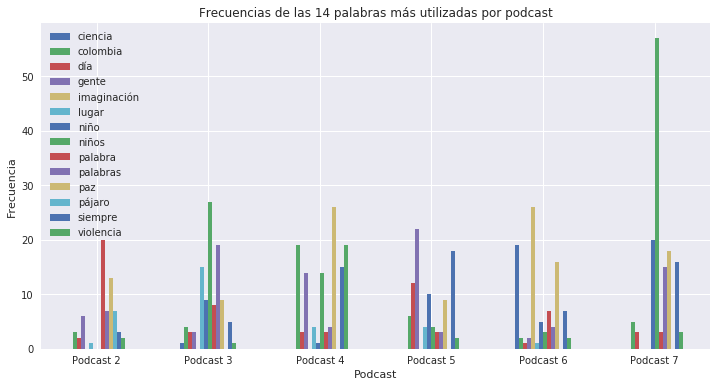

In [20]:
ax = df.T.plot(
    figsize=(12, 6),
    kind='bar',
    title='Frecuencias de las 14 palabras más utilizadas por podcast',
    rot=0,
)
ax.set_xlabel('Podcast')
ax.set_ylabel('Frecuencia');